# Project-5 : Glass Identification

**Project Description:**

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


**To predict:**

Type of Glass

In [65]:
# Importing necessary libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [66]:
# Importing Dataset:

glass = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
glass

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [67]:
# To display top 5 rows:

glass.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [68]:
glass.shape

(213, 11)

**There are 213 rows and 11 columns.**

In [69]:
glass.columns

Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')

In [70]:
# Renaming columns to understand better:

glass.set_axis(['id', 'RI', 'Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'], axis='columns', inplace=True)
glass.head()

#set_axis() is used to rename columns/rows name , axis = 'columns' means we want to change columns name.
# Here we can also change rows name , but we have to provide enough rows name (i.e 213 names for 213 rows)

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [71]:
# Finding null values

glass.isnull().sum()

id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

**Great , There is no null values , we can go ahead.**

In [72]:
glass.describe()

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


**There are some columns which have zero values , like Ba or Fe . So we have to replace these values.**

We will replace these zero values with the mean of the other values of that column , we will take mean because data is continuous.

In [73]:
glass['Ba']=glass['Ba'].replace(0,glass['Ba'].mean())
glass['Fe']=glass['Fe'].replace(0,glass['Fe'].mean())

In [74]:
# Let's Verify:

glass.describe()

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.320361,0.095731,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.449154,0.076323,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.060000,0.010000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.175869,0.057277,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.175869,0.057277,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.175869,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


**So , there is no zero value in any column. So , It is verified.**

# Data Distribution:

<AxesSubplot:xlabel='RI', ylabel='Density'>

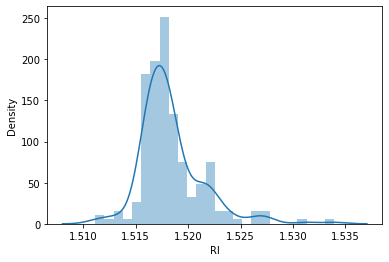

In [75]:
sns.distplot(glass['RI'])

<AxesSubplot:xlabel='Na', ylabel='Density'>

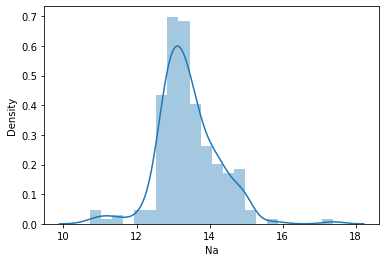

In [76]:
sns.distplot(glass['Na'])

<AxesSubplot:xlabel='Mg', ylabel='Density'>

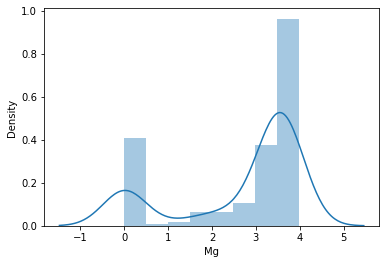

In [77]:
sns.distplot(glass['Mg'])


<AxesSubplot:xlabel='Al', ylabel='Density'>

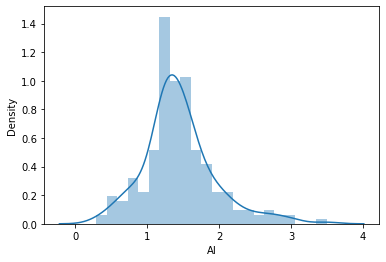

In [78]:
sns.distplot(glass['Al'])

<AxesSubplot:xlabel='Si', ylabel='Density'>

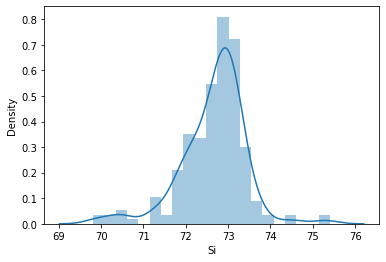

In [79]:
sns.distplot(glass['Si'])

<AxesSubplot:xlabel='K', ylabel='Density'>

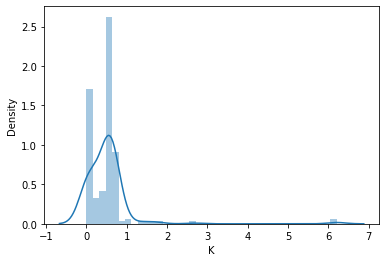

In [80]:
sns.distplot(glass['K'])

<AxesSubplot:xlabel='Ca', ylabel='Density'>

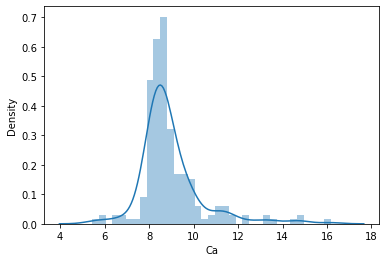

In [81]:
sns.distplot(glass['Ca'])

<AxesSubplot:xlabel='Ba', ylabel='Density'>

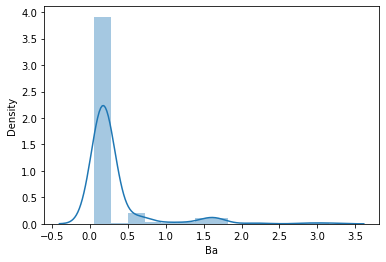

In [82]:
sns.distplot(glass['Ba'])

<AxesSubplot:xlabel='Fe', ylabel='Density'>

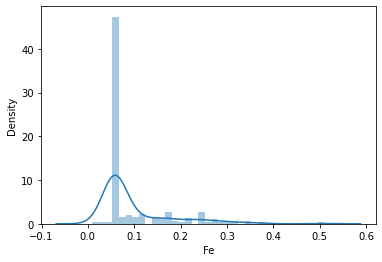

In [83]:
sns.distplot(glass['Fe'])

In [84]:
# Let's detect skewness

glass.skew()

id               0.000000
RI               1.639658
Na               0.457318
Mg              -1.154323
Al               0.900017
Si              -0.744546
K                6.549276
Ca               2.040591
Ba               3.692318
Fe               2.284710
Type of glass    1.108861
dtype: float64

**There is very much skewness in dataset. Due to this skewness , above distribution plots are not symmetric , let's use power transformer to make these plots symmetric.**

In [85]:
glass_log=np.log(glass['RI'])
glass_log.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0      0.417137
1      0.416194
2      0.417170
3      0.417012
4      0.416049
         ...   
208    0.416227
209    0.416636
210    0.419138
211    0.416412
212    0.416807
Name: RI, Length: 213, dtype: float64>

In [86]:
from sklearn.preprocessing import PowerTransformer
import seaborn as sns

In [87]:
features=['Ba','Fe','Ca','K','Si','Al','Mg','RI']
scaler=PowerTransformer(method='yeo-johnson')
glass[features]=scaler.fit_transform(glass[features].values)

In [88]:
# Let's verify skewness now:

glass.skew()

id               0.000000
RI               0.000000
Na               0.457318
Mg              -0.911150
Al               0.000874
Si               0.133867
K               -0.075233
Ca              -0.207808
Ba               1.074926
Fe               0.611737
Type of glass    1.108861
dtype: float64

**Still , there is some skewness in few columns.**

**Let's visualize these skewness using box plot to understant better.**


<AxesSubplot:xlabel='Type of glass', ylabel='Fe'>

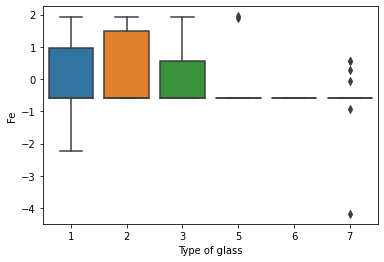

In [89]:
sns.boxplot('Type of glass', 'RI', data=glass)

<AxesSubplot:xlabel='Type of glass', ylabel='Na'>

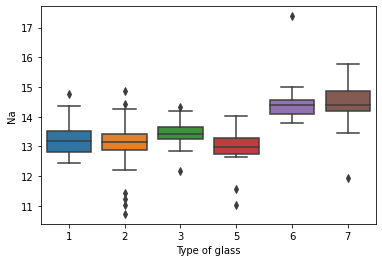

In [90]:
sns.boxplot('Type of glass', 'Na', data=glass)

<AxesSubplot:xlabel='Type of glass', ylabel='Mg'>

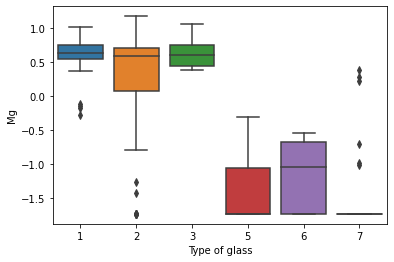

In [91]:
sns.boxplot('Type of glass', 'Mg', data=glass)

<AxesSubplot:xlabel='Type of glass', ylabel='Al'>

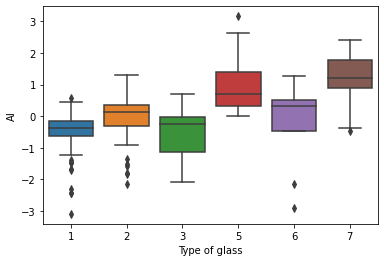

In [92]:
sns.boxplot('Type of glass', 'Al', data=glass)

<AxesSubplot:xlabel='Type of glass', ylabel='Si'>

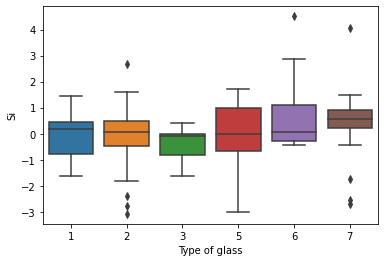

In [93]:
sns.boxplot('Type of glass', 'Si', data=glass)

<AxesSubplot:xlabel='Type of glass', ylabel='K'>

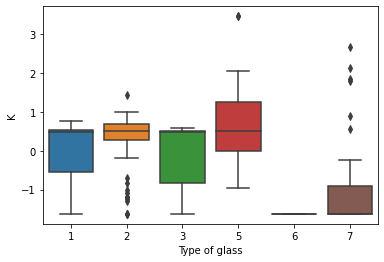

In [94]:
sns.boxplot('Type of glass', 'K', data=glass)

<AxesSubplot:xlabel='Type of glass', ylabel='Ca'>

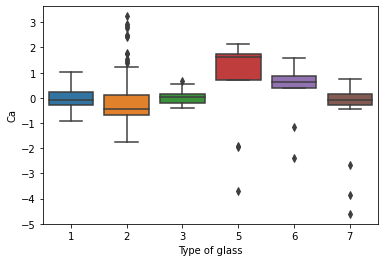

In [95]:
sns.boxplot('Type of glass', 'Ca', data=glass)

<AxesSubplot:xlabel='Type of glass', ylabel='Ba'>

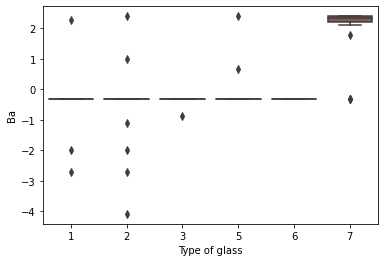

In [96]:
sns.boxplot('Type of glass', 'Ba', data=glass)

<AxesSubplot:xlabel='Type of glass', ylabel='Fe'>

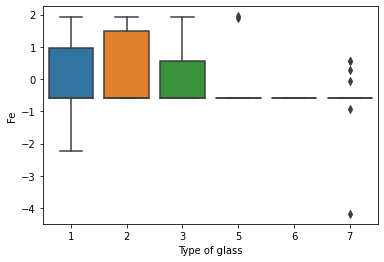

In [97]:
sns.boxplot('Type of glass', 'Fe', data=glass)

**We observed that there is so much outliers present in data , so we need to remove these outliers to get good accuracy.**

In [105]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(glass))
print(z.head())

         id        RI        Na        Mg        Al        Si         K  \
0  1.723938  0.229755  0.591880  0.681474  0.081445  0.038252  0.268575   
1  1.707675  0.704878  0.150946  0.620552  0.286720  0.394607  0.011888   
2  1.691411  0.229755  0.240996  0.793249  0.232162  0.121300  0.496129   
3  1.675147  0.308942  0.167507  0.706078  0.342629  0.521438  0.447821   
4  1.658884  0.784065  0.755419  0.693759  0.442150  0.366668  0.656025   

         Ca        Ba        Fe  Type of glass  
0  0.882521  0.302429  0.570628       0.851703  
1  0.936107  0.302429  0.570628       0.851703  
2  0.487918  0.302429  0.570628       0.851703  
3  0.634960  0.302429  0.570628       0.851703  
4  0.634960  0.302429  1.869530       0.851703  


In [100]:
threshold = 3  
print(np.where(z > 3))

# if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

(array([ 20, 105, 105, 105, 106, 106, 111, 141, 162, 162, 162, 170, 171,
       183, 183, 184, 185, 195, 200], dtype=int64), array([4, 1, 2, 5, 1, 7, 1, 8, 4, 5, 7, 6, 6, 2, 5, 7, 7, 9, 5],
      dtype=int64))


In [106]:
glass=glass[(z < 3).all(axis=1)]

In [107]:
glass.shape

(200, 11)

In [109]:
# Correlation:


glass.corr()

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
id,1.000000,-0.001431,0.429969,-0.661175,0.466983,0.081442,-0.430165,0.192956,0.531934,-0.102493,0.874911
RI,-0.001431,1.000000,-0.048097,-0.100126,-0.500922,-0.578837,-0.274352,0.747896,-0.154078,0.031994,-0.082418
Na,0.429969,-0.048097,1.000000,-0.350086,0.233736,-0.246560,-0.591828,-0.128515,0.562545,-0.187521,0.556693
Mg,-0.661175,-0.100126,-0.350086,1.000000,-0.511848,-0.303648,0.509483,-0.462515,-0.608362,0.135523,-0.788266
Al,0.466983,-0.500922,0.233736,-0.511848,1.000000,0.281607,0.012847,-0.265606,0.544738,-0.097739,0.593891
Si,0.081442,-0.578837,-0.246560,-0.303648,0.281607,1.000000,0.008776,-0.211816,0.169900,-0.059170,0.196724
K,-0.430165,-0.274352,-0.591828,0.509483,0.012847,0.008776,1.000000,-0.411770,-0.502850,0.168252,-0.532035
Ca,0.192956,0.747896,-0.128515,-0.462515,-0.265606,-0.211816,-0.411770,1.000000,-0.075305,0.024865,0.137826
Ba,0.531934,-0.154078,0.562545,-0.608362,0.544738,0.169900,-0.502850,-0.075305,1.000000,-0.202544,0.707155
Fe,-0.102493,0.031994,-0.187521,0.135523,-0.097739,-0.059170,0.168252,0.024865,-0.202544,1.000000,-0.208856


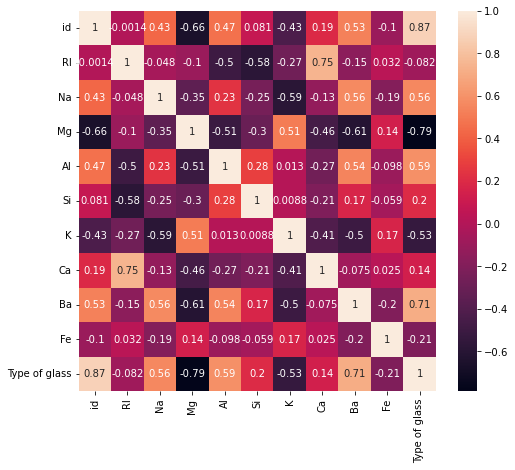

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_=glass.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_,annot=True)   # annot = True , means array used in dataset is of same shape.
plt.show()

**Here , 'Mg'column is highly negative correlated so we can drop the Mg column.**

In [111]:
glass.drop(columns=['Mg'],axis=1,inplace=True)

In [113]:
glass

,id,RI,Na,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,-2.081668e-17,13.89,-0.081445,0.038252,0.268575,-0.882521,-0.302429,-0.570628,1
1,3,-6.245005e-17,13.53,0.286720,0.394607,0.011888,-0.936107,-0.302429,-0.570628,1
2,4,-2.081668e-17,13.21,-0.232162,-0.121300,0.496129,-0.487918,-0.302429,-0.570628,1
3,5,-2.775558e-17,13.27,-0.342629,0.521438,0.447821,-0.634960,-0.302429,-0.570628,1
4,6,-6.938894e-17,12.79,0.442150,0.366668,0.656025,-0.634960,-0.302429,1.869530,1
...,...,...,...,...,...,...,...,...,...,...
208,210,-6.245005e-17,14.14,2.415518,-0.121300,-1.195502,0.333739,2.373630,-0.570628,7
209,211,-4.510281e-17,14.92,1.104938,0.493096,-1.627123,-0.318743,2.393978,-0.570628,7
210,212,6.938894e-17,14.36,1.155073,1.017262,-1.627123,-0.282179,2.394491,-0.570628,7
211,213,-5.204170e-17,14.38,1.020265,1.306184,-1.627123,-0.245979,2.393745,-0.570628,7


In [114]:
#splitting the datasets
x=glass.iloc[:,0:-1]
y=glass.iloc[:,-1]

In [115]:
x.shape

(200, 9)

In [116]:
y.shape

(200,)

In [117]:
x.head()

,id,RI,Na,Al,Si,K,Ca,Ba,Fe
0,2,-2.081668e-17,13.89,-0.081445,0.038252,0.268575,-0.882521,-0.302429,-0.570628
1,3,-6.245005e-17,13.53,0.286720,0.394607,0.011888,-0.936107,-0.302429,-0.570628
2,4,-2.081668e-17,13.21,-0.232162,-0.121300,0.496129,-0.487918,-0.302429,-0.570628
3,5,-2.775558e-17,13.27,-0.342629,0.521438,0.447821,-0.634960,-0.302429,-0.570628
4,6,-6.938894e-17,12.79,0.442150,0.366668,0.656025,-0.634960,-0.302429,1.869530


In [119]:
y

0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type of glass, Length: 200, dtype: int64

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from time import time

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=43)

In [122]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
scaled_x

array([[-1.68720239, -0.26912287,  0.64993206, ..., -1.17777314,
        -0.29958085, -0.61753886],
       [-1.67085749, -0.8322396 ,  0.16696056, ..., -1.24560183,
        -0.29958085, -0.61753886],
       [-1.65451259, -0.26912287, -0.26234743, ..., -0.67829598,
        -0.29958085, -0.61753886],
       ...,
       [ 1.74522679,  0.95096338,  1.28047818, ..., -0.41787662,
         2.64986761, -0.61753886],
       [ 1.76157169, -0.69146042,  1.30730993, ..., -0.37205472,
         2.64905108, -0.61753886],
       [ 1.77791659, -0.50375484,  1.10607181, ..., -0.21520658,
         2.65015935, -0.61753886]])

In [129]:
#DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier
glass_gini=DecisionTreeClassifier(criterion='gini')
glass_gini.fit(x_train,y_train)
glass_entropy=DecisionTreeClassifier(criterion='entropy')
glass_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [130]:
y_pred_train=glass_entropy.predict(x_train)
y_pred_test=glass_entropy.predict(x_test)

In [132]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(confusion_matrix(y_test,y_pred_test))

[[23  1  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  4  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  1  0  3  0]
 [ 0  0  0  0  0  7]]


In [133]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        24
           2       0.95      1.00      0.97        18
           3       0.80      0.80      0.80         5
           5       0.67      1.00      0.80         2
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         7

    accuracy                           0.95        60
   macro avg       0.90      0.92      0.90        60
weighted avg       0.96      0.95      0.95        60



In [134]:
print(accuracy_score(y_test,y_pred_test))

0.95


In [135]:
accuracy_train=cross_val_score(glass_entropy,X=x_train,y=y_train,cv=15)
accuracy_test=cross_val_score(glass_entropy,X=x_test,y=y_test,cv=15)
print(accuracy_train)
print('\n')
print(accuracy_test)

[1.         1.         1.         0.9        1.         0.88888889
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


[1.   1.   1.   1.   1.   1.   1.   1.   1.   0.75 1.   1.   1.   1.
 1.  ]


In [136]:
print(accuracy_train.mean())
print(accuracy_test.mean())

0.9859259259259259
0.9833333333333333


# Conclusion:

**The glass identification model gives a high level of accuracy in both training and testing, with a score of 98% in both cases. This concludes that the model is performing accurately in identifying the types of glass in the dataset. This high accuracy indicates that the model has been properly trained and is able to generalize well to new data. Therefore, this model could be used as a reliable tool for glass identification.**

